# Апостериорная вероятность

In [4]:
import matplotlib.pyplot as plt
from scipy.stats import gamma, norm, uniform
from functools import reduce
import numpy as np
import matplotlib
matplotlib.rc('font', size=22)
matplotlib.rc('animation', html='html5')
bigfontsize=20
labelfontsize=16
tickfontsize=16
plt.rcParams.update({'font.size': bigfontsize,
                     'axes.labelsize':labelfontsize,
                     'xtick.labelsize':tickfontsize,
                     'ytick.labelsize':tickfontsize,
                     'legend.fontsize':tickfontsize,
                     })




Итак, функция правдоподобия описывает вероятность получить наши значения выборки $\mathcal{D}$ при условии того что модель задается какими-то параметрами $\theta$:

$$ \mathcal{L}(\mathcal{D}|\theta) $$

Используя формулу Байеса, можно преобразовать функцию правдоподобия в функцию плотности вероятности значений модели при условии наблюдения нашего набора данных:

$$p(\theta|\mathcal{D}) = \frac{\mathcal{L}(\mathcal{D}|\theta)p(\theta)}{p(\mathcal{D})}\equiv  \frac{\mathcal{L}(\mathcal{D}|\theta)p(\theta)}{\int p(\theta^\prime)\mathcal{L}(\mathcal{D}|\theta^\prime)d\theta^\prime}$$

$p(\theta)$ называется априроным распределением и отражает наши представления о параметре до начала измерений, а $\int p(\theta^\prime)\mathcal{L}(\mathcal{D}|\theta^\prime)d\theta^\prime$ назыается маргинальной функцие правдоподобия и по сути яваляется нормировкой. Вероятность $p(\theta|\mathcal{D})$ называется апостериорной вероятностью.

Максимизация апостериорной вероятности дает оценку параметров с учетом априорного знания - в отличие от наибольшего правдоподобия.

Как и функция правдоподобия, априорная вероятность максимизируется через минимизацию отрицательного логарифма:
    
$$ - \log p(\theta|\mathcal{D}) = -\log\mathcal{L}(\mathcal{D}|\theta)-\log p(\theta)+\log p(\mathcal{D}) \equiv  -\log\mathcal{L}(\mathcal{D}|\theta)-\log p(\theta)+C$$

Разница с NLL заключается в дополнительном слагаемом $-\log p(\mathcal{D})$ и константе

## Распределение Бернулли

Начнем с простейшего примера. Допустим, мы хотим определить параметр $\theta$ распределения Бернулли. 

Зададим априорное распределение параметра:

In [2]:
from scipy.stats import beta
prior = beta(2, 2)

No handles with labels found to put in legend.


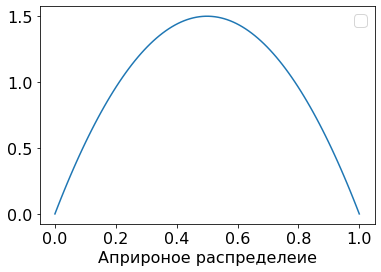

In [6]:
plt.plot(np.linspace(0, 1,100),prior.pdf(np.linspace(0, 1,100)))
plt.xlabel("Априроное распределеие")
plt.legend()

Просимулирем данные с истинным значением параметра $\theta = 0.1$

In [7]:
from scipy.stats import bernoulli
p_true = 0.1
x = bernoulli(p_true).rvs(1000)

Зададим функцию правдоподобия

In [15]:
def likelihood(x,theta):
    return np.prod(bernoulli(theta).pmf(x))

Зададим маргинальную функцию правдоподобия

In [16]:
def marg_likelihood(x):
    return np.sum(
            [
                np.prod(
                        bernoulli(theta).pmf(x)
                        )*0.01 
                for theta in np.linspace(0, 1, 100)
            ])

In [17]:
def posterior(x, theta):
    return likelihood(x,theta)*prior.pdf(theta)/ marg_likelihood(x)

Посмотрим как меняется апостериорная вероятность в зависимости от количества набранных данных

In [ ]:
thetas = np.linspace(0, 1, 100)

In [19]:
posterior_0 = [posterior([],theta) for theta in thetas]

In [20]:
posterior_1 = [posterior(x[:1],theta) for theta in thetas]

In [21]:
posterior_5 = [posterior(x[:5],theta) for theta in thetas]

In [22]:
posterior_10 = [posterior(x[:10],theta) for theta in thetas]

In [25]:
posterior_100 = [posterior(x[:100],theta) for theta in thetas]

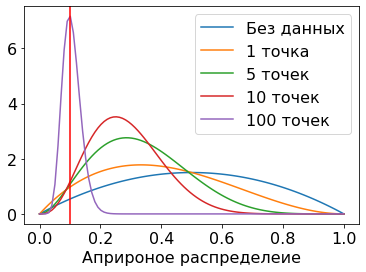

In [31]:
plt.plot(thetas,posterior_0, label = "Без данных")
plt.plot(thetas,posterior_1, label = "1 точка")
plt.plot(thetas,posterior_5, label = "5 точек")
plt.plot(thetas,posterior_10, label = "10 точек")
plt.plot(thetas,posterior_100, label = "100 точек")
plt.axvline(p_true, color = "red")
plt.xlabel("Априроное распределеие")
plt.legend()

## Нормальное распределение

Зададим априорное распределение

In [32]:
from scipy.stats import norm
prior = norm(1, 3)

Зададим данные

In [33]:
mu_true = 2
x = norm(mu_true, 1).rvs(1000)

Зададим функцию правдоподобия

In [34]:
def likelihood(x,mu):
    return np.prod(norm(mu, 1).pdf(x))

Зададим маргинальную функцию правдоподобия

In [40]:
def marg_likelihood(x):
    return np.sum(
            [
                np.prod(
                        norm(mu, 1).pdf(x)
                        )*0.1 
                for mu in np.linspace(-3, 7, 100)
            ])

Зададим постериор

In [41]:
def posterior(x, mu):
    return likelihood(x,mu)*prior.pdf(mu)/ marg_likelihood(x)

Посмотрим на зависимость постериора от данных

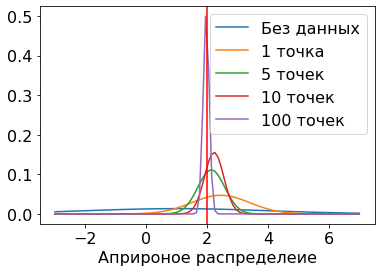

In [42]:
mus = np.linspace(-3, 7, 100)
posterior_0 = [posterior([],mu) for mu in mus]
posterior_1 = [posterior(x[:1],mu) for mu in mus]
posterior_5 = [posterior(x[:5],mu) for mu in mus]
posterior_10 = [posterior(x[:10],mu) for mu in mus]
posterior_100 = [posterior(x[:100],mu) for mu in mus]

plt.plot(mus,posterior_0, label = "Без данных")
plt.plot(mus,posterior_1, label = "1 точка")
plt.plot(mus,posterior_5, label = "5 точек")
plt.plot(mus,posterior_10, label = "10 точек")
plt.plot(mus,posterior_100, label = "100 точек")
plt.axvline(mu_true, color = "red")
plt.xlabel("Априроное распределеие")
plt.legend()